In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./감정5000.csv')
df.head(10)

,id,document,label
0,@prollymiss4953,"제가 제일 좋아하는 때껄룩님 플리로 시작하네요 ,, ♡ 요즘 학업이 너무 힘들고 많...",1
1,@thedailyvibe247,This playlist is the perfect accompaniment for...,1
2,@TokyoChill87,Billions of people.. yet we're still alone lis...,1
3,@cloverfield-,I’m sitting outside at the recovery home I’m a...,1
4,@user-vw4rn7vt7z,역시 떼껄룩 레전드는 드라이브임.. 몇년이 지나도 드라이브 플리 노래들은 꼭꼭 듣는...,1
5,@6-671,전에 30분짜리 들으면서 살짝 길이가 아쉬웠는데 이거 너무 좋아요~,1
6,@kaaak6379,후반부곡들도 물론 좋지만 초반곡들 다 제취향이라 미치도록 좋습니다,1
7,@Yoona_Kpop,원래 이 노래 듣고 봄날의 거리를 걸어야 하겠지만 현실은 시험기간이라 독서실에서 노...,1
8,@eagles810,아직 차가 없어서 유로트럭에서 트럭 몰면서 듣고 있읍니다 ^^ 감사합니다 ㅋㅋ,1
9,@_Ryzuki,"Great video, I hope you can improve the resolu...",1


In [2]:
import re
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다
def text_cleaning(text) :
    #한글의 정규표현식으로 한글만 추출합니다
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+')
    result = hangul.sub('', text)
    return result

# 함수를 적용하여 리뷰에서 한글만 추출합니다.
df = df[df['document'].str.len() >0]
df.tail(10)

,id,document,label
4286,@nealchang9423,여기 모든 사람들 점심 뭐먹지 정도의 고민만 하며 살 수 있으면 좋겠다,1
4287,@jin7806,나중엔 행복해질거니 다들 힘내봅시다.,1
4288,@sattriverdrt1218,여러분들 모두 수고많았어요 모두 고생했어요 당신들은 사랑을 받을 자격이 충분합니다....,1
4289,@user-bp4yz3gt3p,잠시 내려놔도 되고 울어도 되고 포기해도 되고 늦어도 돼 세상에 남아만 있어줘 그럼...,1
4290,@-_.-...,와 노래좋다 녹차공방은 노래가 내스탈ㅋ,1
4291,@jinak7,야근하면서 듣습니다.. 화이팅!,1
4292,@user-lu4pb4np1z,근데 댓글이 1000개 가까이 되는데 꾸준히 댓글 하나하나에 좋아요 눌러주시는 유튜...,1
4293,@user-ep5yx8vw1p,마주오는 무리들앞에 혼자 서 있다는 두려움이 일때 누군가 뒤에 서 있는 기분 참 좋타,1
4294,@user-rw6sg1xy4f,나는 매우 느꼈다 감동을당신의 노래 정말 좋다,1
4295,@user-ef4bi2cm3g,잘 들었읍니다..,1


In [38]:
# 형태소 단위의 추출 함수 정의하기

from konlpy.tag import Okt

#konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다
result = get_pos(df['document'].values[0])
print(result)

['제/Noun', '가/Josa', '제일/Noun', '좋아하는/Adjective', '때껄룩님/Noun', '플리/Noun', '로/Josa', '시작/Noun', '하네요/Verb', ',,/Punctuation', '♡/Foreign', '요즘/Noun', '학업/Noun', '이/Josa', '너무/Adverb', '힘들고/Adjective', '많이/Adverb', '지/Modifier', '치기/Noun', '도/Josa', '하지만/Conjunction', '어떻/Modifier', '게/Noun', '든/Josa', '하고/Verb', '있는/Adjective', '하루/Noun', '에/Josa', '힘/Noun', '이/Josa', '되어주는/Verb', '것/Noun', '같아요/Adjective', '..!!/Punctuation', '한창/Noun', '이/Noun', '플리/Noun', '열심히/Adverb', '들었었는데/Verb', '앞/Noun', '으로도/Josa', '잘/Verb', '부탁/Noun', '할게요/Verb', '최애/Noun', '노래/Noun', '플리/Noun', '님/Suffix']


In [39]:
# 형태소를 벡터 형태의 학습 데이터셋으로 변환합니다.
from sklearn.feature_extraction.text import CountVectorizer

index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['document'].tolist())
print(X.shape)

(4296, 18230)


In [40]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'제/Noun': 14249, '가/Josa': 1159, '제일/Noun': 14261, '좋아하는/Adjective': 14465, '때껄룩님/Noun': 5598, '플리/..


In [41]:
print(df['document'][0])
print(X[0])

제가 제일 좋아하는 때껄룩님 플리로 시작하네요 ,, ♡ 요즘 학업이 너무 힘들고 많이 지치기도 하지만 어떻게든 하고 있는 하루에 힘이 되어주는 것 같아요..!! 한창 이 플리 열심히 들었었는데 앞으로도 잘 부탁할게요 최애 노래 플리님 
  (0, 14249)	1
  (0, 1159)	1
  (0, 14261)	1
  (0, 14465)	1
  (0, 5598)	1
  (0, 16585)	3
  (0, 5946)	1
  (0, 9947)	1
  (0, 16741)	1
  (0, 85)	1
  (0, 949)	1
  (0, 12338)	1
  (0, 16940)	1
  (0, 12840)	2
  (0, 3651)	1
  (0, 18091)	1
  (0, 6312)	1
  (0, 14910)	1
  (0, 15889)	1
  (0, 4637)	1
  (0, 16908)	1
  (0, 11339)	1
  (0, 1856)	1
  (0, 5201)	1
  (0, 16663)	1
  (0, 13470)	1
  (0, 16822)	1
  (0, 11702)	1
  (0, 17992)	1
  (0, 4977)	1
  (0, 1850)	1
  (0, 1603)	1
  (0, 113)	1
  (0, 17031)	1
  (0, 12842)	1
  (0, 11865)	1
  (0, 5432)	1
  (0, 11170)	1
  (0, 12754)	1
  (0, 13830)	1
  (0, 8361)	1
  (0, 17054)	1
  (0, 15793)	1
  (0, 3754)	1
  (0, 4099)	1


### TF-IDF(Term Frequency - Inverse Document Frequency)
#### 단어 빈도를 나타내는 TF와 문서 빈도를 나타내는 DF의 역수인 IDF를 곱한 값을 의미합니다.
 * 다른 문서들에서는 등장하지 않았지만, 현재 문서에서는 많이 등장하는 단어를 의미하며
 * 그 단어가 현재 문서에서 얼마나 중요한지를 피처로 나타낼 수 있는 방법입니다.

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

# 형태소를 벡터 형태의 학습 데이터셋(X데이터)로 변환

tfidf_vecorizer = TfidfTransformer()
X = tfidf_vecorizer.fit_transform(X)

print(X.shape)
print(X[0])

(4296, 18230)
  (0, 18091)	0.12260153749150533
  (0, 17992)	0.12307690095103507
  (0, 17054)	0.16805149391229704
  (0, 17031)	0.1998146541454835
  (0, 16940)	0.18152807418105207
  (0, 16908)	0.13115060357972705
  (0, 16822)	0.11302737991573464
  (0, 16741)	0.15917469742036816
  (0, 16663)	0.10691199941614253
  (0, 16585)	0.34363491470696644
  (0, 15889)	0.22879819765554607
  (0, 15793)	0.17233906152181114
  (0, 14910)	0.15648947063059682
  (0, 14465)	0.1423407021977052
  (0, 14261)	0.13500115360598194
  (0, 14249)	0.1043149575270739
  (0, 13830)	0.09890335713664884
  (0, 13470)	0.10824470488146472
  (0, 12842)	0.08281654729635636
  (0, 12840)	0.11393286586061085
  (0, 12754)	0.15484006118422156
  (0, 12338)	0.10851951943131395
  (0, 11865)	0.11846752547869169
  (0, 11702)	0.06633710304022551
  (0, 11339)	0.17233906152181114
  (0, 11170)	0.11970440628352452
  (0, 9947)	0.13500115360598194
  (0, 8361)	0.18152807418105207
  (0, 6312)	0.10227585180415938
  (0, 5946)	0.09574276688734774
  (

In [43]:
# 긍정/부정 리뷰 분류하기

from sklearn.model_selection import train_test_split

y = df['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)

(3866, 18230)
(430, 18230)


### Logistric Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀 모델을 학습합니다.
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:1]

# 로지스틱 회귀 모델의 성능을 평가합니다
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))


accuracy : 0.83
Precision : 0.809
Recall : 0.888
F1 : 0.847


#### Confusion Martix

In [46]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[148  49]
 [ 26 207]]


In [47]:
# 데이터 비율 확인
df['label'].value_counts()

1     2339
0     1955
11       2
Name: label, dtype: int64

#### 중요 키워드 분석하기

In [48]:
import matplotlib.pyplot as plt

### 지금까지 학습한 감성 분류 모델에서는 어떤 형태소가 높은 영향력을 가지고 있을까?
### 로지스틱 회귀 모델의 피처 영향력을 추출해보면 다음 그래프와 같다
#### 이중 양수인 피처들은 리뷰에서 긍정적이라고 판단되는 형태소이며 음수인 피처들은 리뷰에서 부정적으로 판단되는 형태소이다

[(1.9239588267229812, 3524), (1.81386514801939, 2178), (1.7563070908275547, 14371), (1.7415778948006373, 18104), (1.5962225551900742, 2411)]
[(-1.6764390737545156, 14418), (-1.7394426656416102, 16042), (-1.8394920184451675, 2084), (-2.0430915540987127, 13136), (-2.6531820835140687, 3754)]


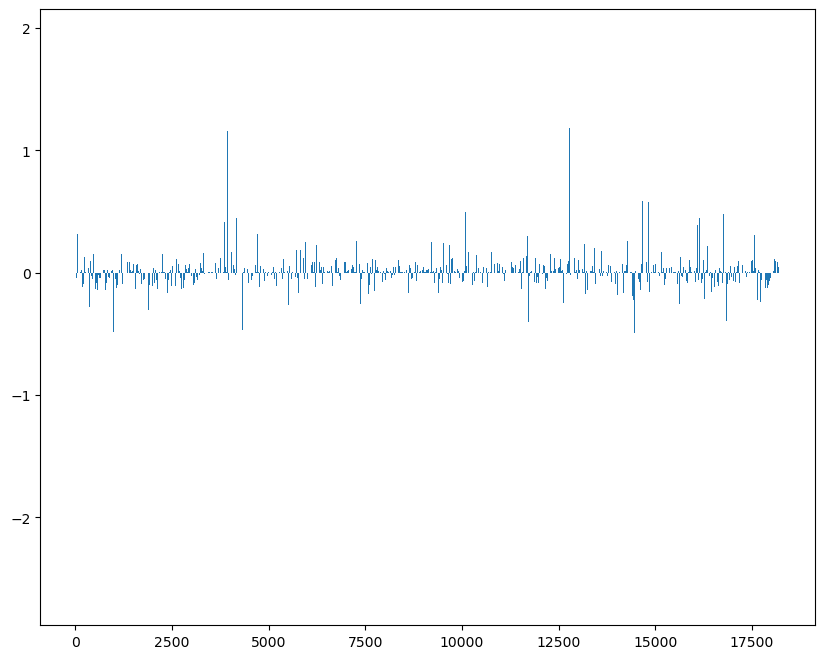

In [49]:
# 학습한 회귀 모델의 계수 출력

plt.rcParams['figure.figsize'] =[10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])

In [50]:
# 회귀모델의 계수를 높은 순으로 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])),
                        reverse=True)

# 회귀 모델의 계수를 index_vectorizer에 맵핑하여 어떤 형태소인지 출력할 수 있게 
invert_index_vetorizer = {v: k for k , v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력합니다. 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는
# 형태소라고 할 수 있다.
print(str(invert_index_vetorizer)[:100]+'..')

{14249: '제/Noun', 1159: '가/Josa', 14261: '제일/Noun', 14465: '좋아하는/Adjective', 5598: '때껄룩님/Noun', 1658..


In [51]:
# 상위 20개 긍정 형태소

for coef in coef_pos_index[:20] :
    print(invert_index_vetorizer[coef[1]], coef[0])

내/Noun 1.9239588267229812
광고/Noun 1.81386514801939
좀/Noun 1.7563070908275547
힘들다/Adjective 1.7415778948006373
그냥/Noun 1.5962225551900742
친구/Noun 1.4414027118671426
이/Josa 1.4301157661253192
좋겠다/Adjective 1.2311512264369073
많이/Adverb 1.2236489625710112
을/Josa 1.1802028159198412
눈물/Noun 1.1599927937256151
../Punctuation 1.1571430692625586
제발/Noun 1.1506206777302053
힘들어요/Adjective 1.1265309363614415
못/VerbPrefix 1.1104635856216423
왜/Noun 1.1073379844703568
한테/Josa 1.070990942176153
힘드네요/Adjective 1.0369128148749844
싶다/Verb 1.033608304844912
안/VerbPrefix 1.0310524656983322
